In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive, FloatSlider, interact, fixed
from divtel import *


import copy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky
from astroplan import FixedTarget
#from . import utils
#from .const import COLORS
#from . import pointing

from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

import healpy as hp
import tqdm


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
cta = CTA_Info('south')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2025-02-24T14:02:54.168


In [3]:
only_SST_array= LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)

In [4]:
only_SST_array.table.units = "deg"
only_SST_array.table
only_SST_array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


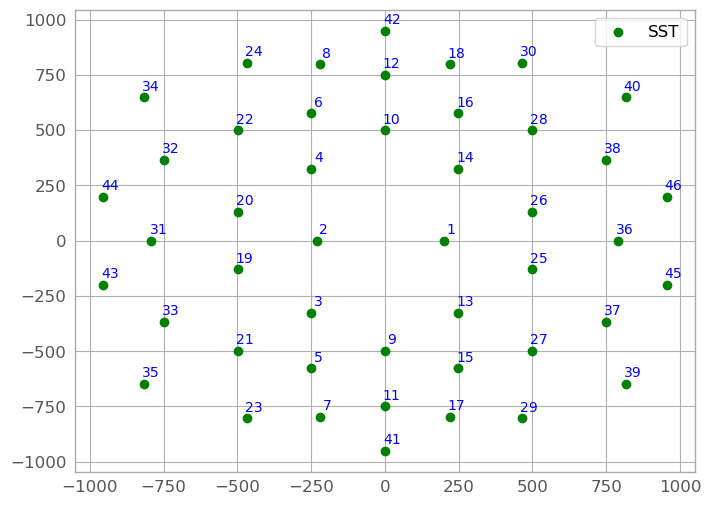

In [5]:
# Loop through all the telescopes
#for fov in array.table["fov"]:
#    print(fov)
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in only_SST_array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
for i in range(len(only_SST_array.table)):
    plt.scatter(only_SST_array.table['x'][i], only_SST_array.table['y'][i], c=colors[i], label=fov_labels[colors[i]])

    # Annotate each point with the telescope ID
    #matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
#Annotate the point xy with text text.
#In the simplest form, the text is placed at xy.
    plt.annotate(str(only_SST_array.table["id"][i]),
                 (only_SST_array.table['x'][i], only_SST_array.table['y'][i]),  # Point position
                 textcoords="offset points",  # Text position relative to the point
                 xytext=(5, 5),  # Offset in pixels (to avoid overlapping the point)
                 ha='center', fontsize=10, color='blue')
handles, labels = plt.gca().get_legend_handles_labels()
#handles, labels like this is doing
    #plt.gca() gets the current Axes object, which is where your plot is
    #.get_legend_handles_labels()
        #handles: Returns a list of the graphical elements (e.g., lines, scatter plot points) that would appear in the legend.
        # labels: Returns the text labels associated with each graphical element in handles

by_label = dict(zip(labels, handles))  # Remove duplicate labels, the dictionary by the structure takes out the double 
plt.legend(by_label.values(), by_label.keys())
#by_label.values This is pulling out the unique graphical elements
# by_label.keys  This is retrieving the unique text 
plt.savefig("./different_telescopes.png", dpi=300, bbox_inches="tight")
plt.show() 

In [16]:
sub_groups = {'1':[44,32,21],
             '2':[43,35,3],
              '3':[33,23,5],
              '4':[34,24,20],
              '5':[19,22,14,13],
              '6':[31,6,2],
              '7':[7,12,39],
              '8':[41,4,18],
              '9':[8,16,26],
              '10':[42,10,28],
              '11':[9,30,40],
              '12':[11,36,37],
              '13':[17,15,27],
              '14':[1,38,45],
              '15':[25,29,46]
              
             }
sub_groups_2 = {'1':[44,35,5], 
             '2':[43,32,24],
              '3':[34,42,3],
              '4':[10,20,28],
              '5':[19,22,14,13],
              '6':[31,6,2],
              '7':[7,12,39],
              '8':[41,4,18],
              '9':[8,16,26],
              '10':[33,15,23],
              '11':[9,30,40],
              '12':[11,36,37],
              '13':[17,21,27],
              '14':[1,38,45],
              '15':[25,29,46]
             }
#sub_groups_2={'1':[18,14,13,17],
#             '2':[7,11,15],
#             '3':[5,8,9,12],
#            '4':[16,6,10]}


best = {'1':[24,12,30,42,8,18], 
             '2':[44,32,34],
              '3':[43,33,35],
              '4':[23,41,29,11,7,17],
              '5':[37,39,45],
              '6':[38,40,46],
              '7':[1,2,9,10],
              '8':[16,26,28],
              '9':[15,25,27],
              '10':[13,14,36],
              '11':[5,19,21],
              '12':[6,20,22],
              '13':[3,4,31]
            
    
}
    



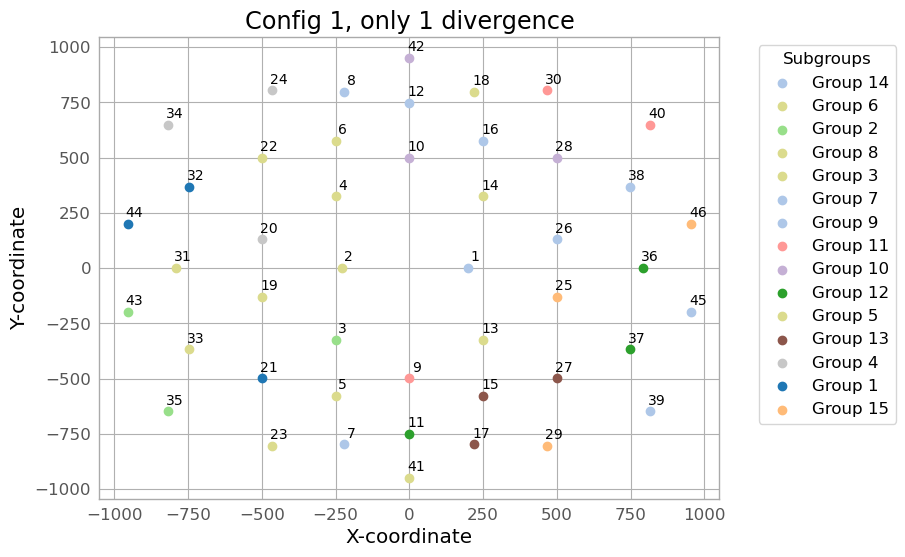

In [17]:
# Define colors for each subgroup
import random
sub_group_colors = {
    str(i): random.choice(plt.cm.tab20.colors)  # Use tab20 colormap for diverse colors
    for i in range(1, 50)  # Assign colors for subgroup IDs 1 to 50
}

# Create a dictionary mapping telescope IDs to their subgroup
id_to_subgroup = {}
for group, ids in sub_groups.items():
    for telescope_id in ids:
        id_to_subgroup[telescope_id] = group

# Assign a color to each telescope based on its subgroup
colors = [
    sub_group_colors.get(
        id_to_subgroup.get(telescope_id, '1'),  # Default subgroup to '1' if not found
        plt.cm.tab20(0)  # Default color (first color in tab20 colormap)
    )
    for telescope_id in only_SST_array.table["id"]
]

# Scatter plot for all points
for i in range(len(only_SST_array.table)):
    plt.scatter(
        only_SST_array.table['x'][i], 
        only_SST_array.table['y'][i], 
        c=[colors[i]],  # Wrap color in a list for scatter
        label=f"Group {id_to_subgroup.get(only_SST_array.table['id'][i], '1')}"
    )
    # Annotate each point with the telescope ID
    plt.annotate(
        str(only_SST_array.table["id"][i]),
        (only_SST_array.table['x'][i], only_SST_array.table['y'][i]),  # Point position
        textcoords="offset points",  # Text position relative to the point
        xytext=(5, 5),  # Offset in pixels
        ha='center', fontsize=10, color='black'
    )

# Add a legend for the subgroups (remove duplicates)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
plt.legend(by_label.values(), by_label.keys(), title="Subgroups", loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title("Config 1, only 1 divergence")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()

/var/folders/6y/fwk8pnpn3l1_063t_xyj4ws80000gn/T/ipykernel_21914/2494909728.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("nipy_spectral", len(sub_groups))  # Create a colormap with 50 colors


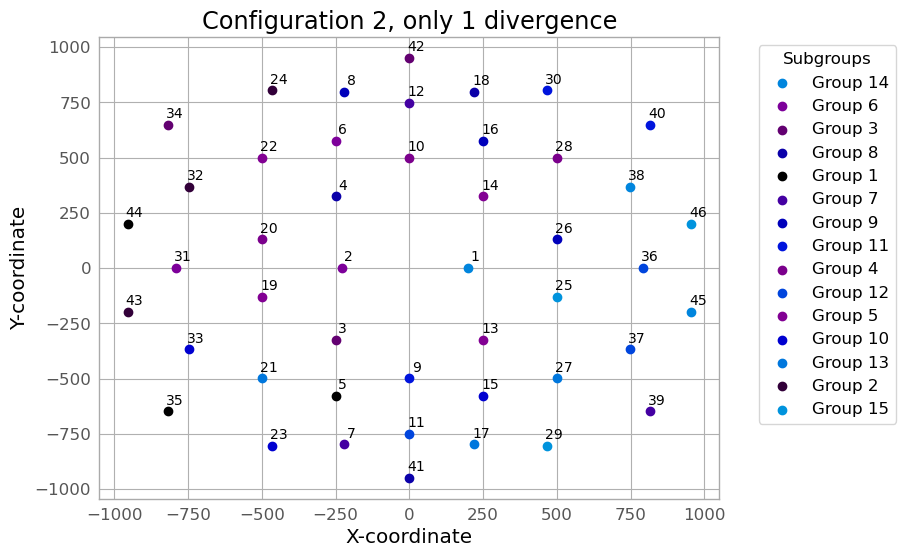

In [18]:
sub_groups = list(range(1, 50))  # Subgroup IDs from 1 to 50
cmap = plt.cm.get_cmap("nipy_spectral", len(sub_groups))  # Create a colormap with 50 colors
sub_group_colors = {str(sub_group): cmap(i) for i, sub_group in enumerate(sub_groups)}
# Create a dictionary mapping telescope IDs to their subgroup
id_to_subgroup = {}
for group, ids in sub_groups_2.items():
    for telescope_id in ids:
        id_to_subgroup[telescope_id] = group

# Assign a color to each telescope based on its subgroup
colors = [
    sub_group_colors.get(
        id_to_subgroup.get(telescope_id, '1'),  # Default subgroup to '1' if not found
        plt.cm.tab20(0)  # Default color (first color in tab20 colormap)
    )
    for telescope_id in only_SST_array.table["id"]
]

# Scatter plot for all points
labeled_groups = set()  # Keep track of labeled groups
for i in range(len(only_SST_array.table)):
    group_label = id_to_subgroup.get(only_SST_array.table['id'][i], '1')
    # Add label only if the group hasn't been labeled yet
    if group_label not in labeled_groups:
        plt.scatter(
            only_SST_array.table['x'][i], 
            only_SST_array.table['y'][i], 
            c=[colors[i]],  # Wrap color in a list
            label=f"Group {group_label}"  # Add group label
        )
        labeled_groups.add(group_label)  # Mark this group as labeled
    else:
        plt.scatter(
            only_SST_array.table['x'][i], 
            only_SST_array.table['y'][i], 
            c=[colors[i]]  # No label for already-labeled groups
        )
    # Annotate each point with the telescope ID
    plt.annotate(
        str(only_SST_array.table["id"][i]),
        (only_SST_array.table['x'][i], only_SST_array.table['y'][i]),  # Point position
        textcoords="offset points",  # Text position relative to the point
        xytext=(5, 5),  # Offset in pixels
        ha='center', fontsize=10, color='black'
    )

# Add a legend for the subgroups (outside the graph)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Subgroups")
plt.title("Configuration 2, only 1 divergence")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()

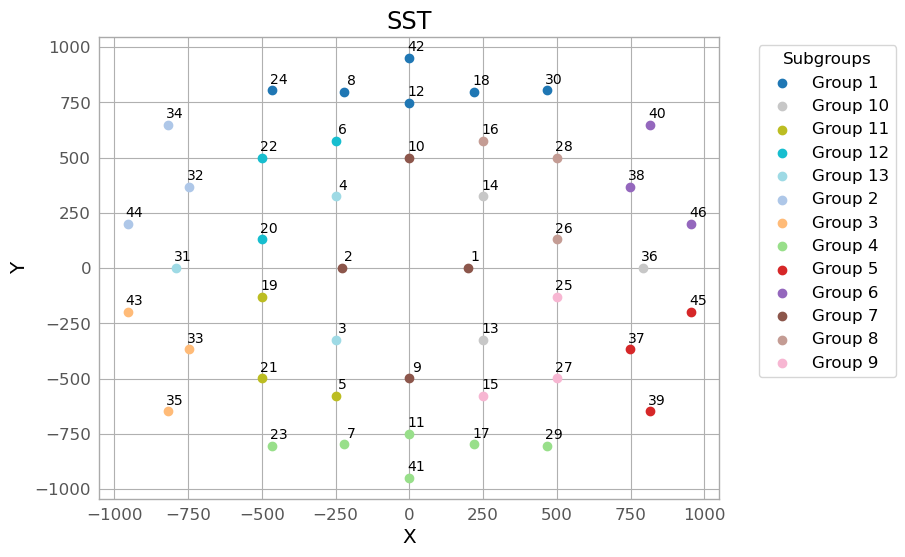

In [22]:
n_groups = len(best)
cmap = plt.cm.tab20

# Evenly spaced values between 0 and 1 for each group:
sub_group_colors = {
    str(i): cmap((i - 1) / (n_groups - 1)) for i in range(1, n_groups + 1)
}

# Create a dictionary mapping telescope IDs to their subgroup
id_to_subgroup = {}
for group, ids in best.items():
    for telescope_id in ids:
        id_to_subgroup[telescope_id] = group
# Assign a color to each telescope based on its subgroup
colors = [
    sub_group_colors.get(
        id_to_subgroup.get(telescope_id, '1'),  # Default subgroup to '1' if not found
        plt.cm.tab20(0)  # Default color (first color in tab20 colormap)
    )
    for telescope_id in only_SST_array.table["id"]
]

# Scatter plot for all points
for i in range(len(only_SST_array.table)):
    plt.scatter(
        only_SST_array.table['x'][i], 
        only_SST_array.table['y'][i], 
        c=[colors[i]],  # Wrap color in a list for scatter
        label=f"Group {id_to_subgroup.get(only_SST_array.table['id'][i], '1')}"
    )
    # Annotate each point with the telescope ID
    plt.annotate(
        str(only_SST_array.table["id"][i]),
        (only_SST_array.table['x'][i], only_SST_array.table['y'][i]),  # Point position
        textcoords="offset points",  # Text position relative to the point
        xytext=(5, 5),  # Offset in pixels
        ha='center', fontsize=10, color='black'
    )

# Add a legend for the subgroups (remove duplicates)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
by_label=dict(sorted(by_label.items()))
plt.legend(by_label.values(), by_label.keys(), title="Subgroups", loc='upper left', bbox_to_anchor=(1.05, 1))
plt.title("SST")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

/var/folders/6y/fwk8pnpn3l1_063t_xyj4ws80000gn/T/ipykernel_21914/4203951101.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("nipy_spectral", len(sub_groups))  # Create a colormap with 50 colors


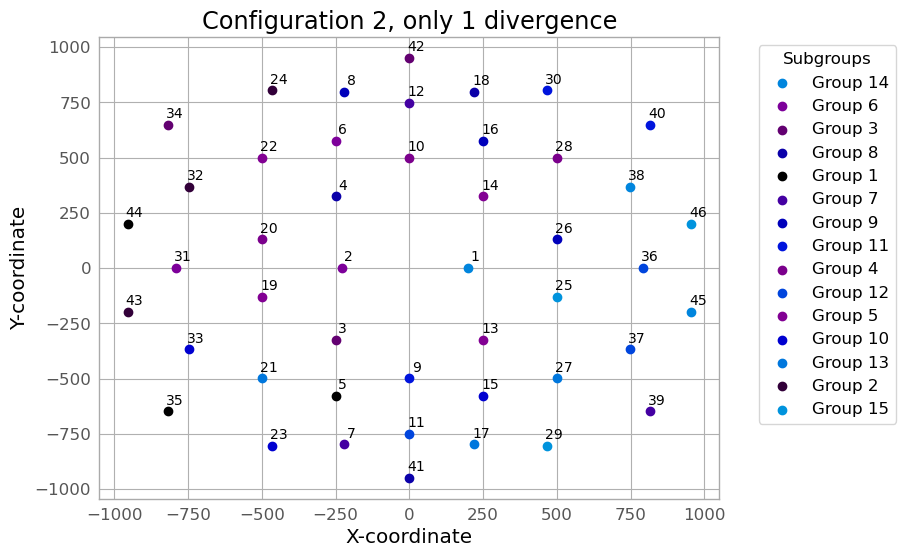

In [20]:
# Use a fixed colormap
sub_groups = list(range(1, 50))  # Subgroup IDs from 1 to 50
cmap = plt.cm.get_cmap("nipy_spectral", len(sub_groups))  # Create a colormap with 50 colors
sub_group_colors = {str(sub_group): cmap(i) for i, sub_group in enumerate(sub_groups)}

# Create a dictionary mapping telescope IDs to their subgroup
id_to_subgroup = {}
for group, ids in sub_groups_2.items():
    for telescope_id in ids:
        id_to_subgroup[telescope_id] = group

# Assign a color to each telescope based on its subgroup
colors = [
    sub_group_colors.get(
        id_to_subgroup.get(telescope_id, '1'),  # Default subgroup to '1' if not found
        cmap(0)  # Default to the first color in the colormap
    )
    for telescope_id in only_SST_array.table["id"]
]

# Scatter plot for all points
labeled_groups = set()  # Keep track of labeled groups
for i in range(len(only_SST_array.table)):
    group_label = id_to_subgroup.get(only_SST_array.table['id'][i], '1')
    if group_label not in labeled_groups:
        plt.scatter(
            only_SST_array.table['x'][i], 
            only_SST_array.table['y'][i], 
            c=[colors[i]], 
            label=f"Group {group_label}"
        )
        labeled_groups.add(group_label)
    else:
        plt.scatter(
            only_SST_array.table['x'][i], 
            only_SST_array.table['y'][i], 
            c=[colors[i]]
        )
    plt.annotate(
        str(only_SST_array.table["id"][i]),
        (only_SST_array.table['x'][i], only_SST_array.table['y'][i]),
        textcoords="offset points", xytext=(5, 5), ha='center', fontsize=10, color='black'
    )

# Add a legend for the subgroups
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Subgroups")
plt.title("Configuration 2, only 1 divergence")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()